In [3]:
!pip install yfinance pandas

In [4]:
import pandas as pd
import yfinance as yf
tesla_data = yf.Ticker("TSLA").history(period="5y")
tesla_data.reset_index(inplace=True)
tesla_data.to_csv("tesla_stock_data.csv", index=False)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-15 00:00:00-04:00,150.103333,152.190002,147.500000,149.626663,107017200,0.0,0.0
1,2020-10-16 00:00:00-04:00,151.479996,151.983337,146.283340,146.556671,98327700,0.0,0.0
2,2020-10-19 00:00:00-04:00,148.746674,149.000000,142.956665,143.610001,108863400,0.0,0.0
3,2020-10-20 00:00:00-04:00,143.916672,143.916672,139.683334,140.646667,94968900,0.0,0.0
4,2020-10-21 00:00:00-04:00,140.899994,144.316666,140.416672,140.880005,97111500,0.0,0.0


In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, "lxml") 

tables = soup.find_all("table", class_=re.compile(r"\bhistorical_data_table\b"))

target_table = None
for t in tables:
    th = t.find("th")
    th_text = (th.get_text(" ", strip=True) if th else "").lower()
    if "tesla quarterly revenue" in th_text:
        target_table = t
        break

if target_table is None:
    raise Exception("Nu am găsit tabelul cu header 'Tesla Quarterly Revenue' într-o celulă <th>.")

rows = []
for tr in target_table.find_all("tr"):
    tds = [td.get_text(strip=True) for td in tr.find_all("td")]
    if len(tds) == 2:
        rows.append(tds)

tesla_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = (tesla_revenue["Revenue"]
                            .str.replace(r"[\$,]", "", regex=True)
                            .str.strip())
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""].reset_index(drop=True)

tesla_revenue.tail()


,Date,Revenue
54,2011-12-31,39
55,2011-09-30,58
56,2011-06-30,58
57,2011-03-31,49
58,2010-12-31,36


In [7]:
import yfinance as yf
gme_data = yf.Ticker("GME").history(period="5y")
gme_data.reset_index(inplace=True)
gme_data.to_csv("gme_stock_data.csv", index=False)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-15 00:00:00-04:00,2.9975,3.775,2.9975,3.4575,159579200,0.0,0.0
1,2020-10-16 00:00:00-04:00,3.4425,3.475,3.2700,3.3275,46606400,0.0,0.0
2,2020-10-19 00:00:00-04:00,3.3600,3.625,3.3450,3.4775,52676400,0.0,0.0
3,2020-10-20 00:00:00-04:00,3.5075,3.535,3.4175,3.4650,26416000,0.0,0.0
4,2020-10-21 00:00:00-04:00,3.4750,3.605,3.4500,3.5250,21447600,0.0,0.0


In [8]:
import requests
from bs4 import BeautifulSoup
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[\$,]', '', regex=True)
gme_revenue = gme_revenue.dropna()
gme_revenue.tail()


,Date,Revenue
55,2011-10-31,1947
56,2011-07-31,1744
57,2011-04-30,2281
58,2011-01-31,3693
59,2010-10-31,1899


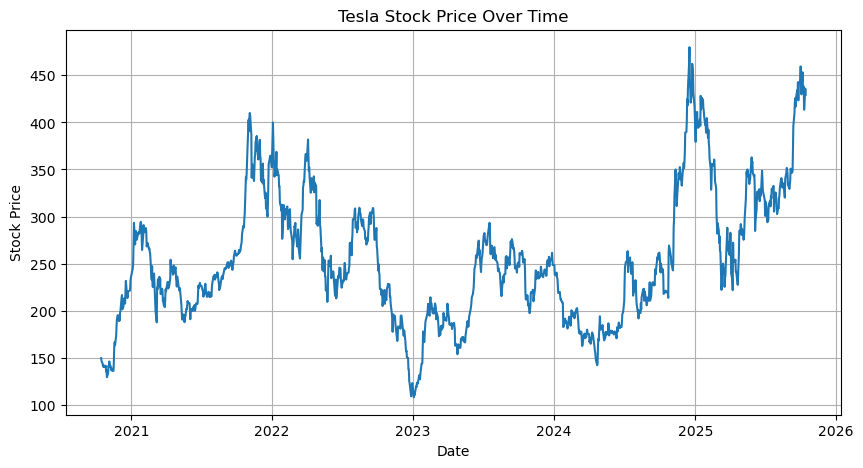

In [9]:
import matplotlib.pyplot as plt
def make_graph(stock_data, title):
    plt.figure(figsize=(10,5))
    plt.plot(stock_data['Date'], stock_data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()
make_graph(tesla_data, "Tesla Stock Price Over Time")


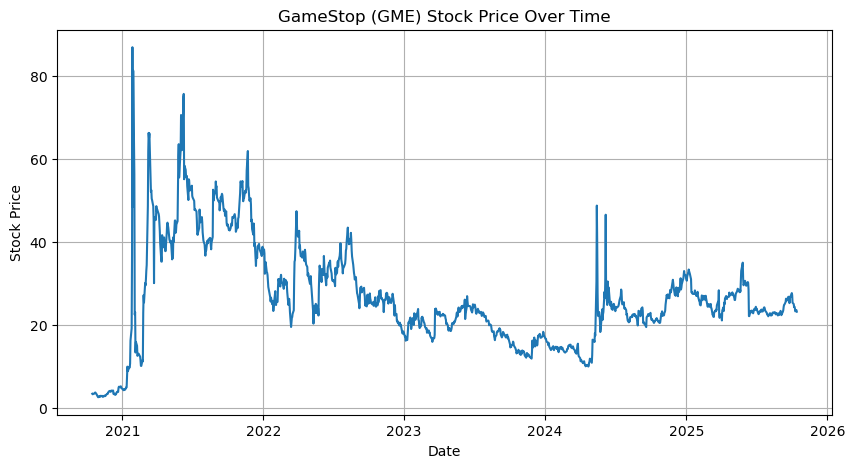

In [10]:
make_graph(gme_data, "GameStop (GME) Stock Price Over Time")
